# 설정


In [3]:
import sys 
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20" 
try: 
  %tensorflow_version only exists in Colab.
except Exception: pass

Unknown TensorFlow version: only exists in Colab.
Currently selected TF version: 2.x
Available versions:
 * 1.x
 * 2.x


In [6]:
import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

In [7]:
import tensorflow as tf 
from tensorflow import keras
#2017250045 정태환
print("tf.__version__: ",tf.__version__)
print("keras.__version__: ",keras.__version__)

tf.__version__:  2.8.0
keras.__version__:  2.8.0


In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print("X_train_full.shape:", X_train_full.shape)
print("X_train_full.dtype:", X_train_full.dtype)
#2017250045 정태환

4431872/4422102 [==============================] - 0s 0us/step
X_train_full.shape: (60000, 28, 28)
X_train_full.dtype: uint8


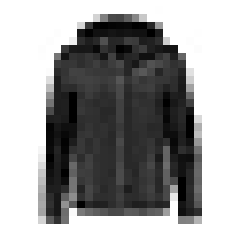

In [9]:
X_valid, X_train = X_train_full[:5000] / 255. , X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
#2017250045 정태환
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#2017250045 정태환
print("class_names[y_train[0]]: ", class_names[y_train[0]])
print("X_valid.shape: ", X_valid.shape) 
print("X_test.shape: ", X_test.shape)

class_names[y_train[0]]:  Coat
X_valid.shape:  (5000, 28, 28)
X_test.shape:  (10000, 28, 28)


Saving figure fashion_mnist_plot


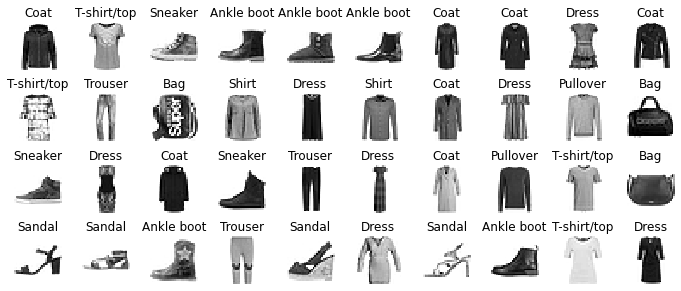

In [11]:
#2017250045 정태환
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

print("model.layers: ",model.layers) 
print("model.summary(): ", model.summary())
#2017250045 정태환
hidden1 = model.layers[1] 
print("hidden1.name: ", hidden1.name) 
print("model.get_layer(hidden1.name) is hidden1: ", model.get_layer(hidden1.name) is hidden1)

model.layers:  [<keras.layers.core.flatten.Flatten object at 0x7f92c01b7190>, <keras.layers.core.dense.Dense object at 0x7f92c01a4790>, <keras.layers.core.dense.Dense object at 0x7f92c01baa10>, <keras.layers.core.dense.Dense object at 0x7f92c01a9410>]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params

In [15]:
weights, biases = hidden1.get_weights() 
print("\nweights: \n", weights) 
print("\nweights.shape: \n", weights.shape) 
print("\nweights.shape: \n", weights.shape) 
print("\nbiases.shape: \n", biases.shape)
#2017250045 정태환


weights: 
 [[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766046  0.03859074
  -0.06889391]
 [ 0.00476504 -0.03105379 -0.0586676  ...  0.00602964 -0.02763776
  -0.04165364]
 [-0.06189284 -0.06901957  0.07102345 ... -0.04238207  0.07121518
  -0.07331658]
 ...
 [-0.03048757  0.02155137 -0.05400612 ... -0.00113463  0.00228987
   0.05581069]
 [ 0.07061854 -0.06960931  0.07038955 ... -0.00384101  0.00034875
   0.02878492]
 [-0.06022581  0.01577859 -0.02585464 ... -0.00527829  0.00272203
  -0.06793761]]

weights.shape: 
 (784, 300)

weights.shape: 
 (784, 300)

biases.shape: 
 (300,)


In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
#2017250045 정태환

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy:

In [18]:
print("\nhistory.params: \n", history.params)
print("\nhistory.epoch: \n", history.epoch) 
print("\nhistory.history.keys(): \n", history.history.keys())
#2017250045 정태환


history.params: 
 {'verbose': 1, 'epochs': 30, 'steps': 1719}

history.epoch: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

history.history.keys(): 
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Saving figure keras_learning_curves_plot


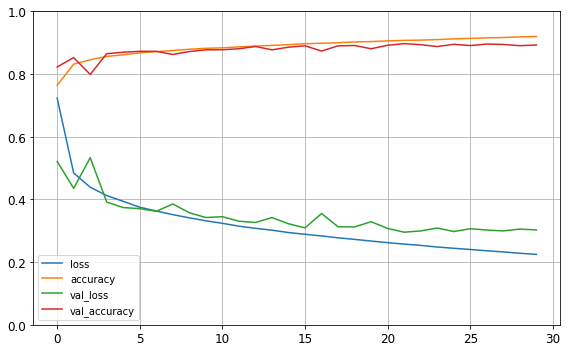

313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8820


model.evaluate(X_test, y_test): 
 [0.3366333842277527, 0.8820000290870667]


In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()
#2017250045 정태환
print("\n\nmodel.evaluate(X_test, y_test): \n", model.evaluate(X_test, y_test))

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print("\ny_proba.round(2): \n", y_proba.round(2))
y_prob = model.predict(X_new)
y_pred = y_prob.argmax(axis=-1)
print("\ny_pred: \n", y_pred)
print("\nnp.array(class_names)[y_pred]: \n",np.array(class_names)[y_pred])
#2017250045 정태환


y_proba.round(2): 
 [[0.   0.   0.   0.   0.   0.01 0.   0.03 0.   0.96]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]

y_pred: 
 [9 2 1]

np.array(class_names)[y_pred]: 
 ['Ankle boot' 'Pullover' 'Trouser']



y_new: 
 [9 2 1]
Saving figure fashion_mnist_images_plot


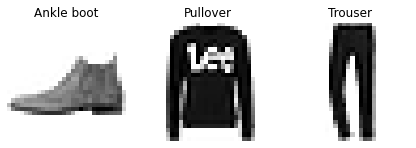

In [25]:
y_new = y_test[:3]
print("\ny_new: \n", y_new)

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()
#2017250045 정태환

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2769 - val_loss: 0.4967
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5067 - val_loss: 0.4355
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4633 - val_loss: 0.4084
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5050 - val_loss: 0.4192
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4456 - val_loss: 0.6633
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4394 - val_loss: 0.4354
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4316 - val_loss: 0.3780
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4099 - val_loss: 0.3744
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4016 - val_loss: 0.3741
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4018 - val_loss: 0.3716

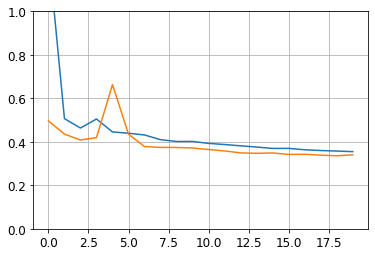


y_pred: 
 [[1.8520542]
 [1.9007921]
 [1.3546442]]


In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42) 
tf.random.set_seed(42)

model = keras.models.Sequential([
  keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

plt.plot(pd.DataFrame(history.history)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) 
plt.show() 
print("\ny_pred: \n", y_pred)
#2017250045 정태환